In [1]:
import numpy as np
import vip_hci
from os import mkdir
from os.path import join, sep,exists
import glob
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import stats
from scipy.ndimage.filters import median_filter
from scipy.ndimage.interpolation import shift


Perform H Band reduction

In [2]:
# Set up paths 
frameSize = 351
band = 'H'
tg_name= '2M1207'
useRefFrames = False
path_input = './Hband/'
path_output = path_input + 'out/'
sep='/'
print(path_input)

path_flats = path_input+'flats'+sep
path_flats_darks = path_input+'flats/darks'+sep
path_sci = path_input+'sci'+sep
path_darks = path_input+'darks'+sep

./2M1207_bands/Hband/


In [3]:
# File list
filelist_flats = glob.glob(path_flats+'*.fits')
filelist_flats_darks = glob.glob(path_flats_darks+'*.fits')
filelist_sci = sorted(glob.glob(path_sci+'*.fits'))
filelist_darks = glob.glob(path_darks+'*.fits')

print((filelist_sci))

['C:/Users/Adolf/Documents/Caltech/Spring2022/Ay105/PhotometryLab/2M1207_bands/Hband/sci\\NACO.2004-04-27T03_54_41.920.fits', 'C:/Users/Adolf/Documents/Caltech/Spring2022/Ay105/PhotometryLab/2M1207_bands/Hband/sci\\NACO.2004-04-27T03_56_08.901.fits', 'C:/Users/Adolf/Documents/Caltech/Spring2022/Ay105/PhotometryLab/2M1207_bands/Hband/sci\\NACO.2004-04-27T03_57_35.981.fits', 'C:/Users/Adolf/Documents/Caltech/Spring2022/Ay105/PhotometryLab/2M1207_bands/Hband/sci\\NACO.2004-04-27T03_59_03.178.fits', 'C:/Users/Adolf/Documents/Caltech/Spring2022/Ay105/PhotometryLab/2M1207_bands/Hband/sci\\NACO.2004-04-27T04_00_51.350.fits', 'C:/Users/Adolf/Documents/Caltech/Spring2022/Ay105/PhotometryLab/2M1207_bands/Hband/sci\\NACO.2004-04-27T04_02_18.216.fits', 'C:/Users/Adolf/Documents/Caltech/Spring2022/Ay105/PhotometryLab/2M1207_bands/Hband/sci\\NACO.2004-04-27T04_03_44.710.fits', 'C:/Users/Adolf/Documents/Caltech/Spring2022/Ay105/PhotometryLab/2M1207_bands/Hband/sci\\NACO.2004-04-27T04_05_11.355.fits']

H BAND RAW IMAGE

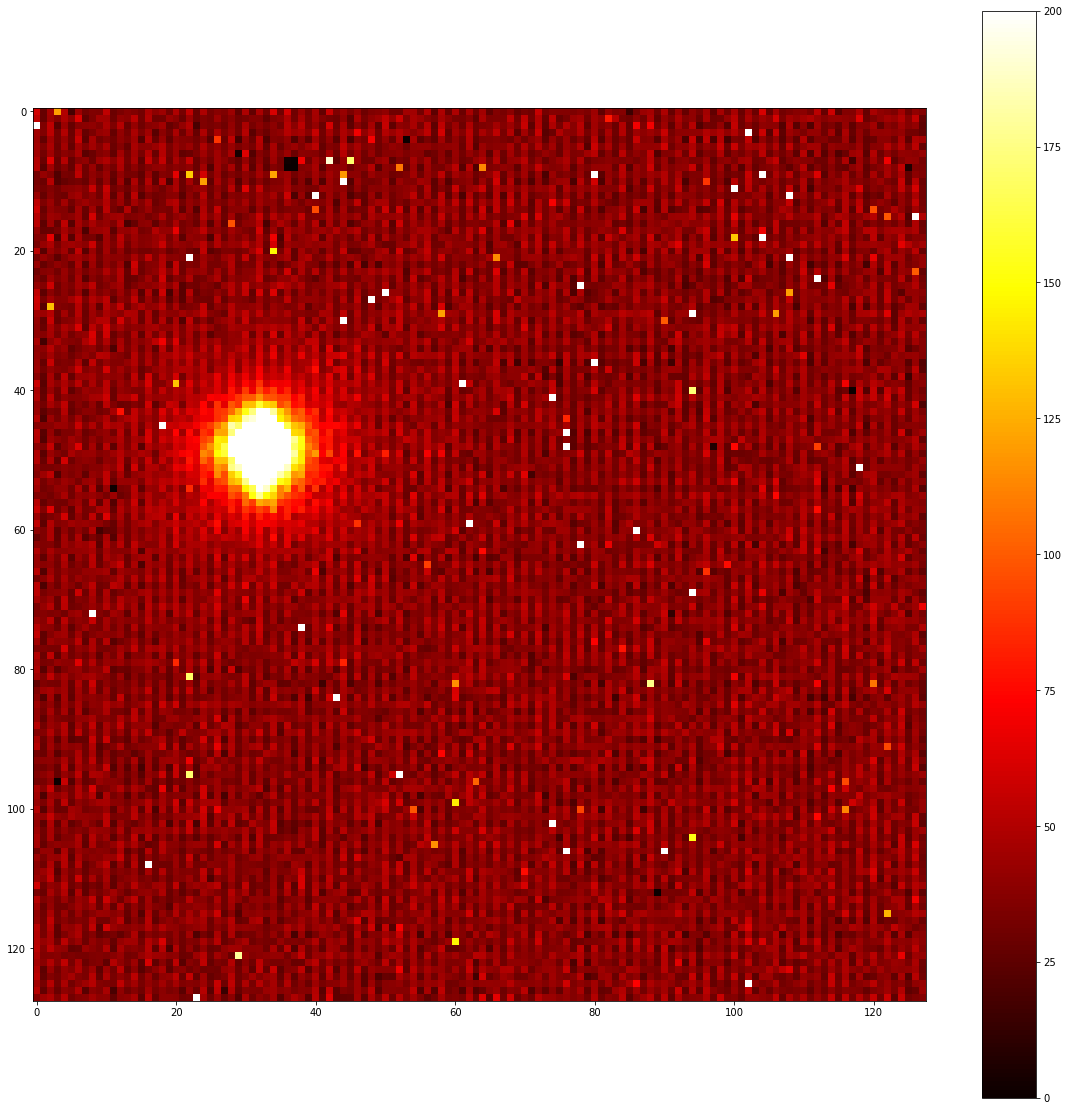

In [4]:
raw_sci = fits.open(filelist_sci[0])[0].data
crop = 128
dimx = raw_sci.shape[0]
dimy = raw_sci.shape[1]
x1 = int((dimx - crop)/2)
x2 = int(x1 + crop)
y1 = int((dimy - crop)/2)
y2 = int(y1 + crop)
raw_sci = shift(raw_sci,[-100,-100])
raw_cropped = raw_sci[x1:x2,y1:y2]
raw_cropped.shape
plt.figure(figsize=(20,20))
plt.imshow(raw_cropped,vmin=0,vmax=200,cmap='hot')
plt.colorbar()
plt.show();

H BAND MASTER FLAT

 id xcentroid ycentroid sharpness  ... sky    peak       flux       mag     
--- --------- --------- ---------- ... --- ---------- --------- ------------
  1 41.187661 47.322506  0.4543168 ...   0 -4.0982437 1.1937722  -0.19230365
  2 86.809841 48.989612 0.33080357 ...   0 -9.2626171 1.0267773 -0.028690612
  3 64.217419 64.173589 0.51704187 ...   0  1080.6907 144.37228   -5.3987096
 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1 41.187661 47.322506   -309.24306
  2 86.809841 48.989612   -431.79295
  3 64.217419 64.173589    17560.187


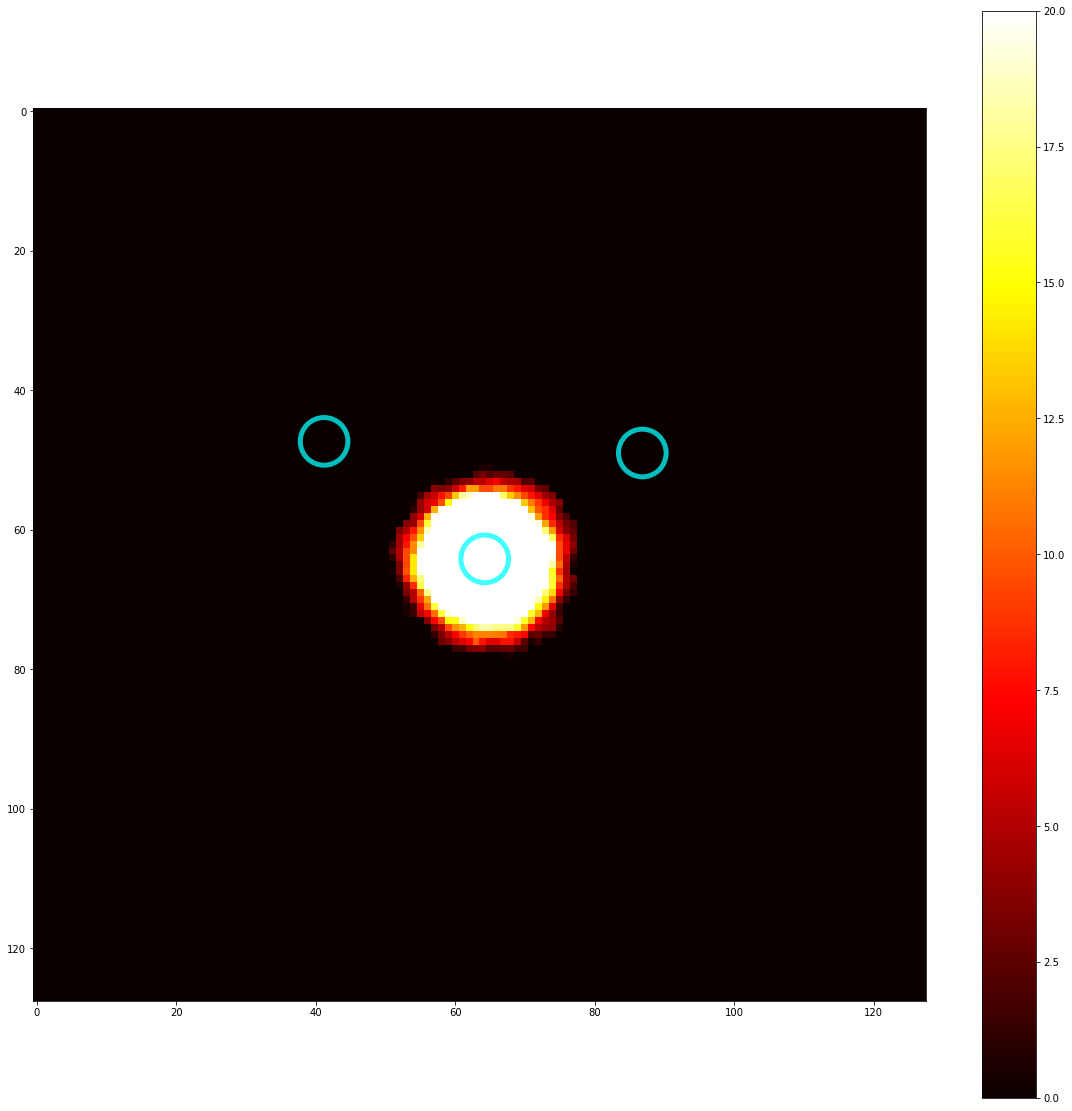

In [26]:
from photutils import DAOStarFinder
from astropy.stats import mad_std
bkg_sigma = mad_std(final_image_cropped)
filter_fwhm = 206265*1630.0*1.0e-9/8.2 / 0.012
daofind = DAOStarFinder(fwhm = filter_fwhm, threshold = 3.0*bkg_sigma)
sources = daofind(final_image_cropped)
for col in sources.colnames:
    sources[col].info.format = '%.8g'
print(sources)

from photutils import aperture_photometry, CircularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=filter_fwhm)
phot_table = aperture_photometry(final_image_cropped, apertures)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'
print(phot_table)

plt.figure(figsize = [20,20])
plt.imshow(final_image_cropped,vmin=0,vmax=20,cmap='hot')
plt.colorbar()
apertures.plot(color = 'cyan', lw = 5, alpha = 0.75)

In [27]:
print(bkg_sigma)
FluxRatio = phot_table[1][3]/phot_table[2][3]
print("Planet Mag = ", -2.5*np.log10(FluxRatio) + 12.388)

1.2349174286296776
Planet Mag =  nan


<ipython-input-27-dc86989db42c>:3: RuntimeWarning: invalid value encountered in log10
  print("Planet Mag = ", -2.5*np.log10(FluxRatio) + 12.388)
